### Importando Libs

In [36]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

### Carregando um conjunto de dados de exemplo

In [14]:
vinhos = datasets.load_wine()

In [15]:
vinhos.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]], shape=(178, 13))

In [16]:
# descrição dos atributos (colunas)
atributos = ['Alcool', 'Acido malico', 'Cinzas', 
             'Alcalinidade das cinzas', 'Magnesio', 
             'Fenois totais', 'Flavonoides', 
             'Fenois nao flavonoides', 'Proantocianinas',
             'Intensidade da cor', 'Matiz',
             'OD280/OD315 de vinhos diluídos', 'Prolina']

# criando a coluna alvo
alvo = 'classe'

# criando o dataframe com as colunas atributos definidas
vinhos_df = pd.DataFrame(vinhos.data, columns=atributos)

# Adiciona o rótulo da classe
vinhos_df[alvo] = vinhos.target

### Exploração dos dados

In [17]:
vinhos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Alcool                          178 non-null    float64
 1   Acido malico                    178 non-null    float64
 2   Cinzas                          178 non-null    float64
 3   Alcalinidade das cinzas         178 non-null    float64
 4   Magnesio                        178 non-null    float64
 5   Fenois totais                   178 non-null    float64
 6   Flavonoides                     178 non-null    float64
 7   Fenois nao flavonoides          178 non-null    float64
 8   Proantocianinas                 178 non-null    float64
 9   Intensidade da cor              178 non-null    float64
 10  Matiz                           178 non-null    float64
 11  OD280/OD315 de vinhos diluídos  178 non-null    float64
 12  Prolina                         178 

In [18]:
vinhos_df.columns

Index(['Alcool', 'Acido malico', 'Cinzas', 'Alcalinidade das cinzas',
       'Magnesio', 'Fenois totais', 'Flavonoides', 'Fenois nao flavonoides',
       'Proantocianinas', 'Intensidade da cor', 'Matiz',
       'OD280/OD315 de vinhos diluídos', 'Prolina', 'classe'],
      dtype='object')

In [19]:
vinhos_df.describe()

,Alcool,Acido malico,Cinzas,Alcalinidade das cinzas,Magnesio,Fenois totais,Flavonoides,Fenois nao flavonoides,Proantocianinas,Intensidade da cor,Matiz,OD280/OD315 de vinhos diluídos,Prolina,classe
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### Pré-processamento


In [20]:
# Copiando o dataframe e separando as colunas de Atributos e Alvo
X = vinhos_df[atributos].copy()
y = vinhos_df[alvo].copy()

# Instanciar o scaler e ajustar as características
scaler = StandardScaler()
scaler.fit(X.values)

#Transformar as características
X_scaled = scaler.transform(X.values)

print(X_scaled[0])

[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
  1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
  1.01300893]


### Separação para treino e teste

In [26]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7)

print(f'Tamanho do treino: {round(len(X_train_scaled)/len(X)*100)}% \n Tamanho do teste: {round(len(X_test_scaled)/len(X)*100)}%')

Tamanho do treino: 70% 
 Tamanho do teste: 30%


### Construção do modelo

In [29]:
# Construindo o modelo
knn = KNeighborsClassifier(n_neighbors=3)

# Adicionando conjunto de parâmetros X (atributos) e Y (classe) para treino
knn.fit(X_train_scaled, y_train) 

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


### Avaliação do modelo

In [37]:
def evaluate_model(model, X_test, y_test):
 y_pred = model.predict(X_test)
 cm = confusion_matrix(y_test, y_pred)
 ConfusionMatrixDisplay(confusion_matrix=cm).plot()
 plt.show()
 accuracy = accuracy_score(y_test, y_pred)
 f1 = f1_score(y_test, y_pred, average='weighted')
 print(f"Acurácia: {accuracy * 100:.2f}%")
 print(f"F1-score: {f1:.2f}")

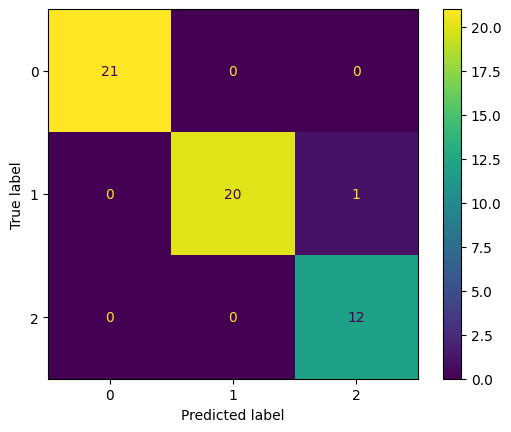

Acurácia: 98.15%
F1-score: 0.98


In [38]:
evaluate_model(knn, X_test_scaled, y_test)